# Introducción

Finalmente, retomaremos el problema del segundo notebook para poder hacer una clasificación usando nuestros métodos de ensamble.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Entrenamiento de Modelos

Antes de entrenar nuestro modelo, vamos a recordar el problema de nuestro primer árbol de decisión:

Un primer problema es que tenemos un data set desbalanceado en donde una clase está más representada que otras. Como resultado, podríamos tener un sobreajuste para las clases más representadas y subajuste para la clase principal (percha).

En este caso, usaremos nuestros métodos de ensamble para categorizar cada una de estas clases.

Recordemos que la precisión con el primer árbol fue de 0,78.

In [4]:
X = df.drop(["Species"], axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [9]:
bagging = BaggingClassifier().fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
accuracy_score(y_test, y_pred_bagging)

0.78125

In [10]:
boosting = AdaBoostClassifier().fit(X_train, y_train)
y_pred_boosting = boosting.predict(X_test)
accuracy_score(y_test, y_pred_boosting)

0.28125

In [11]:
random = RandomForestClassifier().fit(X_train, y_train)
y_pred_random = random.predict(X_test)
accuracy_score(y_test, y_pred_random)

0.78125

En este caso, hemos visto que Bagging y Random Forest tuvieron resultados solo un poco mejores a un árbol de clasificación. Lo más llamativo es como AdaBoost se desempeñó bastante peor. La razón puede ser dada porque el problema no le permite generar los suficientes árboles para generar una mejor predicción. Si pudieramos incluir más entradas y/o features, nuestro modelo podría funcionar mejor.

Finalmente, podemos generar dos matrices de confusión para ver el desempeño de nuestros clasificadores Bagging y Random Forest.

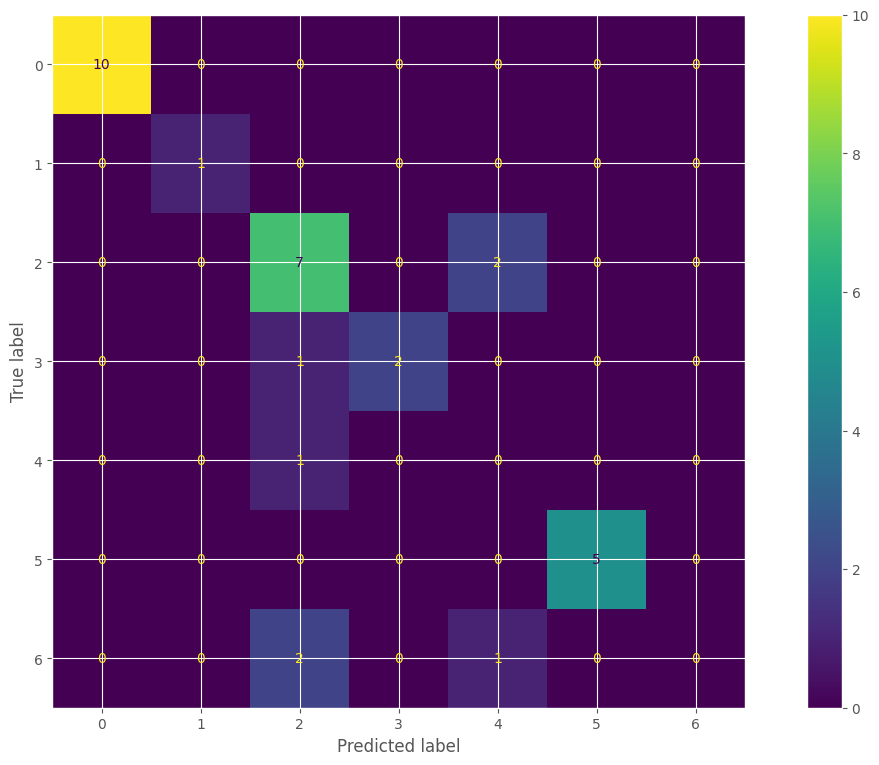

In [16]:
matriz = confusion_matrix(y_test, y_pred_bagging)
cm = ConfusionMatrixDisplay(confusion_matrix= matriz )
cm.plot()
plt.show()

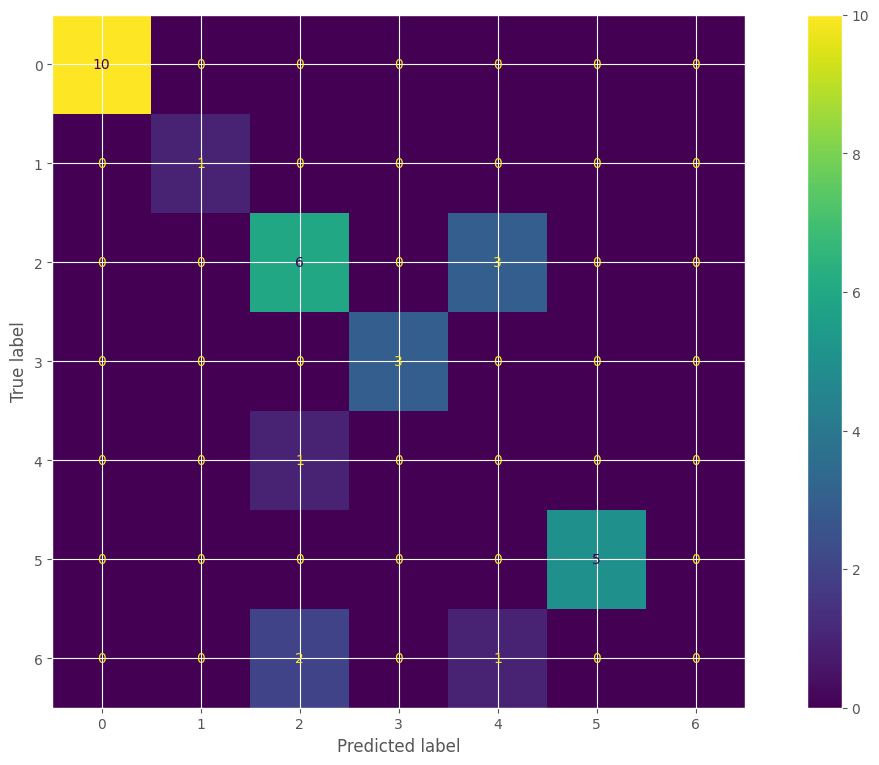

In [18]:
matriz = confusion_matrix(y_test, y_pred_random)
cm = ConfusionMatrixDisplay(confusion_matrix= matriz)
cm.plot()
plt.show()


En ambos casos, tuvieron aciertos similares al árbol de clasificación. En un caso real, posiblemente nos iríamos por Random Forest dado que mejoró mucho las predicciones de la clase principal. Presumiblemente (y suponiendo que el data set es representativo de una población total), podría resolver exitosamente la mayoría de casos.

Sin embargo, tenemos que seguir sospechando de las predicciones perfectas del resto de las clases. Podríamos tener o no un sobreajuste en este sentido.